In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from faker import Faker
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import random

       Longitud (m)  Tiempo (s)  Gravedad calculada (m/s^2)
count    100.000000  100.000000                  100.000000
mean       1.659900    0.551900                   11.794600
std        0.421906    0.087671                    5.153574
min        0.820000    0.400000                    4.070000
25%        1.347500    0.480000                    7.960000
50%        1.645000    0.555000                   10.890000
75%        1.977500    0.620000                   14.197500
max        2.490000    0.700000                   28.790000


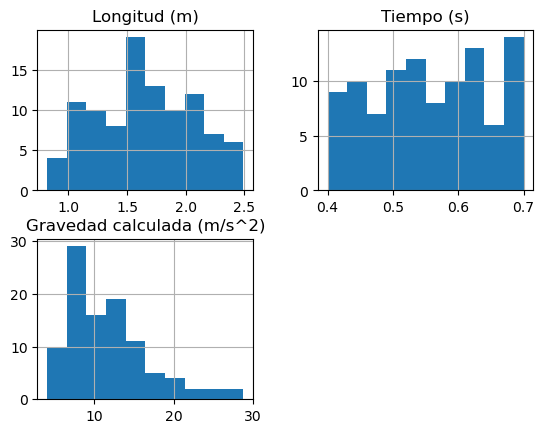

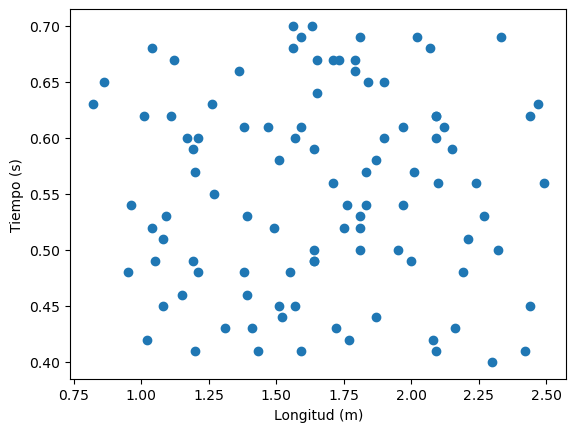

                                       Longitud (m)  Tiempo (s)  \
Longitud (m)                               1.000000    0.008280   
Tiempo (s)                                 0.008280    1.000000   
Gravedad calculada (m/s^2)                 0.594974   -0.750928   
Planeta más probable (código)              0.494551   -0.643025   
Segundo planeta más probable (código)     -0.494551    0.643025   

                                       Gravedad calculada (m/s^2)  \
Longitud (m)                                             0.594974   
Tiempo (s)                                              -0.750928   
Gravedad calculada (m/s^2)                               1.000000   
Planeta más probable (código)                            0.710897   
Segundo planeta más probable (código)                   -0.710897   

                                       Planeta más probable (código)  \
Longitud (m)                                                0.494551   
Tiempo (s)                            

In [3]:
fake = Faker()
planets = ["Tierra", "Marte", "Júpiter", "Saturno", "Urano", "Neptuno"]
accelerations = [9.8, 3.7, 24.8, 10.4, 8.9, 11.2]

def generate_sample():
    L = round(random.uniform(0.8, 2.5), 2)
    t = round(random.uniform(0.4, 0.7), 2)
    g_calculated = round((2 * L)/(t**2), 2)
    most_probable_planet = "Tierra" if abs(g_calculated - 9.8) < abs(g_calculated - 9.0) else "Saturno"
    second_most_probable_planet = "Saturno" if most_probable_planet == "Tierra" else "Tierra"

    return {
        "ID": fake.uuid4(),
        "Longitud (m)": L,
        "Tiempo (s)": t,
        "Gravedad calculada (m/s^2)": g_calculated,
        "Planeta más probable": most_probable_planet,
        "Segundo planeta más probable": second_most_probable_planet
    }

dataset = ([generate_sample() for _ in range(100)])

df = pd.DataFrame(dataset)
print(df.describe())

df.hist(column=["Longitud (m)", "Tiempo (s)", "Gravedad calculada (m/s^2)"])
plt.show()

plt.scatter(df["Longitud (m)"], df["Tiempo (s)"])
plt.xlabel("Longitud (m)")
plt.ylabel("Tiempo (s)")
plt.show()

label_encoder = LabelEncoder()
df["Planeta más probable (código)"] = label_encoder.fit_transform(df["Planeta más probable"])
df["Segundo planeta más probable (código)"] = label_encoder.fit_transform(df["Segundo planeta más probable"])

print(df.corr())



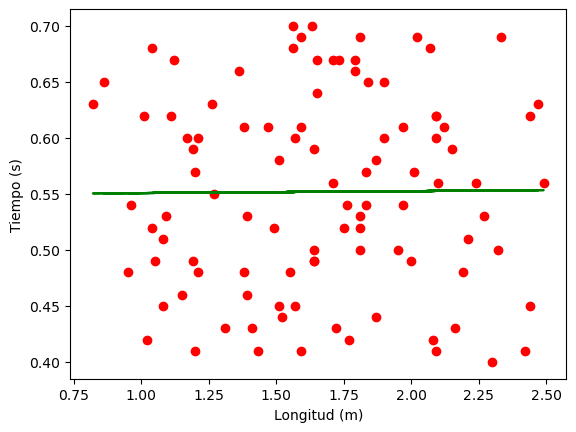

Tierra     61
Saturno    39
Name: Planeta más probable, dtype: int64
Saturno    61
Tierra     39
Name: Segundo planeta más probable, dtype: int64


In [4]:
x = df["Longitud (m)"].values.reshape(-1, 1)
y = df["Tiempo (s)"].values.reshape(-1, 1)

model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)

plt.scatter(x, y, color="red")
plt.plot(x, y_pred, color="green")
plt.xlabel("Longitud (m)")
plt.ylabel("Tiempo (s)")
plt.show()

print(df["Planeta más probable"].value_counts())
print(df["Segundo planeta más probable"].value_counts())